In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib.pyplot import *
import matplotlib.pyplot as plt  




In [2]:
# Reading the csv file into a pandas DataFrame

df = pd.read_csv("datadownloadrevised.csv", encoding = 'utf8')
df.head()



PCT_OBESE_ADULTS08  LACCESS_POP10  LACCESS_POP15  PCH_LACCESS_POP_10_15  \
0                32.0        18428.0        17497.0                    5.0   
1                26.0        35211.0        30561.0                   13.0   
2                38.0         5722.0         6070.0                    6.0   
3                32.0         1045.0          969.0                    7.0   
4                32.0         1548.0         3724.0                  141.0   

   PCT_LACCESS_POP10  PCT_LACCESS_POP15  LACCESS_LOWI10  LACCESS_LOWI15  \
0               34.0               32.0          5344.0          6544.0   
1               19.0               17.0          9952.0          9887.0   
2               21.0               22.0          3136.0          2949.0   
3                5.0                4.0           491.0           596.0   
4                3.0                6.0           609.0          1651.0   

   PCH_LACCESS_LOWI_10_15  PCT_LACCESS_LOWI10  ...  PCT_NHPI10  PCT_65OLDER10  \
0                    22.0                10.0  ...         0.0           12.0   
1                     1.0                 5.0  ...         0.0           17.0   
2                     6.0                11.0  ...         0.0           14.0   
3                    21.0                 2.0  ...         0.0           13.0   
4                   171.0                 1.0  ...         0.0           15.0   

   PCT_18YOUNGER10  MEDHHINC15  POVRATE15  PERPOV10  CHILDPOVRATE15  \
0             27.0       56580       13.0         0            19.0   
1             23.0       52387       13.0         0            20.0   
2             22.0       31433       32.0         1            45.0   
3             23.0       40767       22.0         0            29.0   
4             25.0       50487       15.0         0            22.0   

   PERCHLDPOV10  METRO13  POPLOSS10  
0             0        1          0  
1             0        1          0  
2             1        0          0  
3             1        1          0  
4             0        1          0  

[5 rows x 180 columns]

In [3]:
# Selecting independent variables
X = df.loc[:, df.columns != 'PCT_OBESE_ADULTS08']
X


# Selecting the depending variable 

y = df.iloc[:,0] 
y



0       32.0
1       26.0
2       38.0
3       32.0
4       32.0
5       38.0
6       37.0
7       34.0
8       36.0
9       32.0
10      35.0
11      37.0
12      36.0
13      32.0
14      29.0
15      33.0
16      35.0
17      32.0
18      33.0
19      34.0
20      34.0
21      30.0
22      34.0
23      40.0
24      32.0
25      29.0
26      34.0
27      31.0
28      32.0
29      30.0
        ... 
3113    28.5
3114    27.1
3115    27.1
3116    28.5
3117    29.0
3118    27.6
3119    27.5
3120    20.9
3121    27.0
3122    28.4
3123    29.5
3124    27.7
3125    25.7
3126    25.1
3127    25.7
3128    25.3
3129    22.9
3130    24.4
3131    21.0
3132    26.1
3133    27.1
3134    21.8
3135    22.6
3136    23.9
3137    24.0
3138    29.6
3139    13.2
3140    30.3
3141    24.0
3142    28.6
Name: PCT_OBESE_ADULTS08, Length: 3143, dtype: float64

In [4]:
# Applying the SelectKBest class to extract top 6 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
y=y.astype('int')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)



In [5]:
#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns



In [6]:
# Printing 10 best features
    
print(featureScores.nlargest(10,'Score')) 


                        Specs         Score
7      PCH_LACCESS_LOWI_10_15  1.546388e+08
2       PCH_LACCESS_POP_10_15  1.539427e+08
24  PCH_LACCESS_SENIORS_10_15  4.129976e+07
0               LACCESS_POP10  3.322108e+07
1               LACCESS_POP15  2.999279e+07
27            LACCESS_WHITE15  2.477771e+07
93             REDEMP_SNAPS12  1.336538e+07
94             REDEMP_SNAPS16  1.238995e+07
17            LACCESS_CHILD10  7.893209e+06
31             LACCESS_HISP15  7.623096e+06


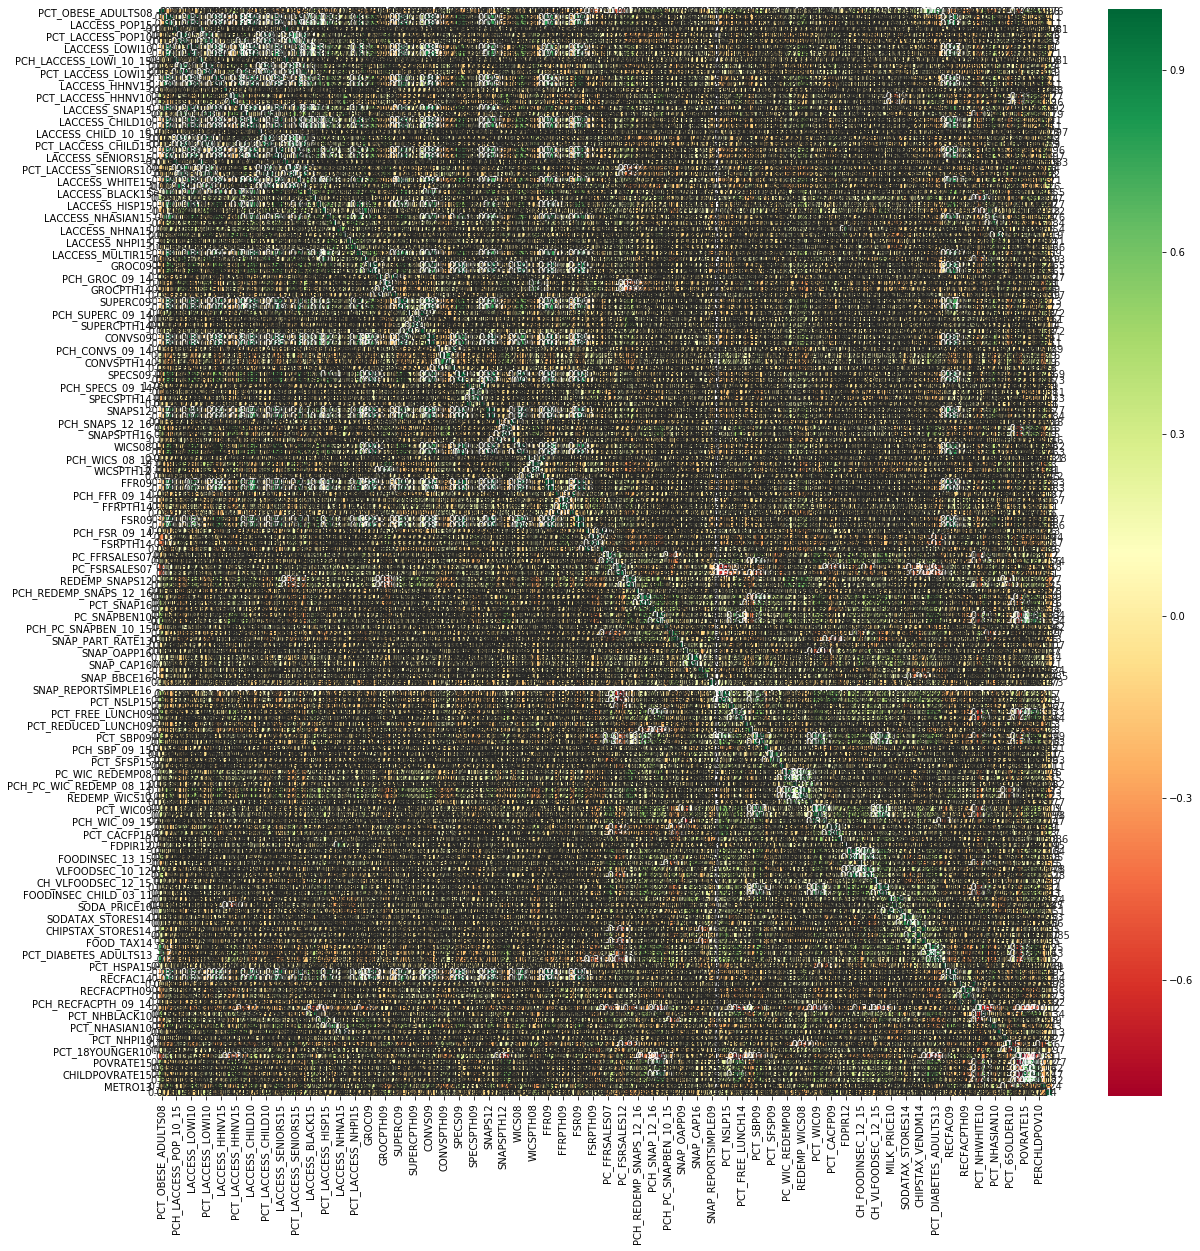

In [7]:
# CORRELATION MATRIX WITH HEATMAP

import seaborn as sns

df = pd.read_csv("datadownloadrevised.csv", encoding = 'utf8')
df.head()

# Selecting independent variables
X = df.loc[:, df.columns != 'PCT_OBESE_ADULTS08']



# Selecting the depending variable 

y = df.iloc[:,0] 



# Getting correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))



# Plotting heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


